In [34]:
import sys
import os
import numpy as np
from tqdm import tqdm
import pickle
import pandas as pd

# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

/Users/zeyichen/Github/Repo/WB_Algo/Stochastic_FP


# DIM = 2

In [35]:
dim = 2
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

In [36]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.random_components(num_components=5, uniform_weights = True, seed = seed) # seed from the measure selection
# source_sampler.set_truncation(truncated_radius)

In [37]:
auxiliary_measure_sampler_set = []
for auxiliary_seed in [1010, 1018, 1014, 1016, 1003]:
    auxiliary_measure_sampler = MixtureOfGaussians(dim)
    auxiliary_measure_sampler.random_components(num_components=5, uniform_weights = True, seed = auxiliary_seed)
    # auxiliary_measure_sampler.set_truncation(truncated_radius)
    auxiliary_measure_sampler_set.append(auxiliary_measure_sampler)

In [38]:
# construct entropic_sampler
entropic_sampler = entropic_input_sampler(dim, 
                                          num_measures, 
                                          auxiliary_measure_sampler_set, 
                                          source_sampler = source_sampler, 
                                          n_k = 1000, 
                                          seed = 120, 
                                          gamma = 0.3, 
                                          manual = True,
                                          truncated_radius = truncated_radius,
                                          bound_type = "eigen_bound")

In [39]:
result_path = "./results/entropic_measures_5_seed_1009_samples_5000_dim_2_epsilon_10"

In [40]:
# Load the sampler attributes
with open(f"{result_path}/entropic_sampler_info.pkl", "rb") as f:
    loaded_data_entropic_sampler = pickle.load(f)

with open(f"{result_path}/source_sampler_info.pkl", "rb") as f:
    loaded_data_source_sampler = pickle.load(f)

print("Loaded Data for Entropic Sampler:", loaded_data_entropic_sampler)
print("Loaded Data for Source Sampler:", loaded_data_source_sampler)

Loaded Data for Entropic Sampler: {'dim': 2, 'num_measures': 5, 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians object at 0x1139791d0>, <true_WB.MixtureOfGaussians object at 0x1be927b90>, <true_WB.MixtureOfGaussians object at 0x1bea08d90>, <true_WB.MixtureOfGaussians object at 0x1bea0ac50>, <true_WB.MixtureOfGaussians object at 0x1be71a8d0>], 'tilde_K': 5, 'source_sampler': <true_WB.MixtureOfGaussians object at 0x1be950390>, 'n_k': 1000, 'seed': 120, 'rng_entropy': RandomState(MT19937) at 0x17E8EEB40, 'gamma': 0.3, 'manual': True, 'truncated_radius': 150, 'bound_type': 'eigen_bound', 'grid_size': 200, 'strong_convexity_param_dict': {0: 0.0001, 1: 0.0001, 2: 0.0001, 3: 0.0001, 4: 0.0001}, 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10}, 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
       [-24.38674772, -23.76266702],
       [ 97.2196175 ,  -0.66185246],
       ...,
       [-35.17059538,  10.05658482],
       [-14.49614928, -84.75519572],
       [-10.84955811

In [41]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.__dict__.update(loaded_data_source_sampler)

entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120)
entropic_sampler.__dict__.update(loaded_data_entropic_sampler)

## Plot 1: Plot the groundtruth barycenter measure and the auxiliary measures for generating synthetic problem instances.

In [42]:
# Combine images into a single image
from PIL import Image

plot_dirc = f"{result_path}/plots"

# Paths to the uploaded images
image_paths = [
    f"{plot_dirc}/source_GMM_pdf.png",
    f"{plot_dirc}/auxiliary_0_pdf.png",
    f"{plot_dirc}/auxiliary_1_pdf.png",
    f"{plot_dirc}/auxiliary_2_pdf.png",
    f"{plot_dirc}/auxiliary_3_pdf.png",
    f"{plot_dirc}/auxiliary_4_pdf.png"
]

# Load the images
images = [Image.open(path) for path in image_paths]

# Get dimensions of individual images (assuming all are the same size)
image_width, image_height = images[0].size

# Define the layout (2 rows x 3 columns)
rows, cols = 2, 3

# Calculate dimensions for the combined image
combined_width = cols * image_width
combined_height = rows * image_height

# Create a new blank image with a white background
combined_image = Image.new("RGB", (combined_width, combined_height), "white")

# Place images into the combined image
for index, image in enumerate(images):
    row = index // cols
    col = index % cols
    x_offset = col * image_width
    y_offset = row * image_height
    combined_image.paste(image, (x_offset, y_offset))

# Save the combined image
output_path = f"{plot_dirc}/merged_2x3_initial_images.png"
combined_image.save(output_path)
output_path


'./results/entropic_measures_5_seed_1009_samples_5000_dim_2_epsilon_10/plots/merged_2x3_initial_images.png'

## Plot 2: Plot the V_values and W2_to_true_bary

In [43]:
# load the G_samples from result_path
with open(f"{result_path}/G_samples/G_samples.json", "r") as G_samples_file:
    G_samples = json.load(G_samples_file)

num_iterations = len(G_samples)
num_MCsamples = len(G_samples['iteration_0'])
# print the key of the dictionary
print(num_iterations, num_MCsamples)
G_samples['iteration_0']['0'][0]

20 20


[0.028606161526921615, 0.49327890735454155]

In [44]:
def W2_pot(X, Y): # solving the OT simplex problem using POT package
    M = ot.dist(X, Y)
    a, b = np.ones((X.shape[0],)) / X.shape[0], np.ones((Y.shape[0],)) / Y.shape[0]
    W2_sq = ot.emd2(a, b, M, numItermax=1e6)
    return W2_sq

def V_value_compute(bary_samples, input_sample_collection):
    # Compute the V-value (i.e.,\@ the weighted sum of the Wasserstein distances between the input measures and the generated samples)
    # Notice that when iter = None, this returns the true V_value given by the ground-truth barycenter;
    # Otherwise, it is the V_value returned by an approximated barycenter.
    # The input_sample_collection is a dictionary with k keys, each key corresponds to the samples from the k-th input measure.

    V_value = 0
    num_measures = len(input_sample_collection)
    for measure_index in range(num_measures):
        input_samples = np.array(input_sample_collection[measure_index])
        V_value += W2_pot(input_samples, bary_samples)
    V_value = V_value / num_measures
    return V_value


In [45]:
V_value_dir = f"{result_path}/V_values"
W2_to_true_dirc = f"{result_path}/W2_to_true_bary"

In [46]:
csv_dirc = f"{result_path}/input_and_source_samples/csv_files"
os.path.exists(csv_dirc)

True

In [ ]:
########################## FREEZE THE CODE HERE ########################################
# Iterate over the iterations and the MC samples therein
for iter in range(10):
    print(f"Iteration {iter}")
    G_samples_iter = G_samples[f'iteration_{iter}']
    V_values_MC = []
    W2_to_true_MC = []
    for MCsample in tqdm(range(num_MCsamples)):
        G_samples_MCsample = np.array(G_samples_iter[f'{MCsample}'])
        V_value = 0
        for measure_index in range(num_measures):
            input_measure_samples = pd.read_csv(f"{csv_dirc}/input_measure_samples_{measure_index}.csv", header = None)
            input_samples = np.array(input_measure_samples)
            input_samples = input_samples[np.random.choice(input_samples.shape[0], size=num_samples, replace=False)]
            V_value += W2_pot(input_samples, G_samples_MCsample)
        # normalize the V_value by the number of input measures
        V_value /= num_measures
        V_values_MC.append(V_value)

        bary_samples = pd.read_csv(f"{csv_dirc}/true_barycenter_samples.csv", header = None)
        bary_samples = np.array(bary_samples)
        bary_samples = bary_samples[np.random.choice(bary_samples.shape[0], size=num_samples, replace=False)]
        W2_to_true_MC.append(W2_pot(bary_samples, G_samples_MCsample))
    # Save the V_values and W2_to_true
    with open(f"{V_value_dir}/V_values_iter_{iter}.pkl", "wb") as V_values_file:
        pickle.dump(V_values_MC, V_values_file)
    with open(f"{W2_to_true_dirc}/W2_to_true_iter_{iter}.pkl", "wb") as W2_to_true_file:
        pickle.dump(W2_to_true_MC, W2_to_true_file)

Iteration 0


100%|██████████| 20/20 [06:10<00:00, 18.54s/it]


Iteration 1


100%|██████████| 20/20 [05:43<00:00, 17.17s/it]


Iteration 2


100%|██████████| 20/20 [05:42<00:00, 17.12s/it]


Iteration 3


100%|██████████| 20/20 [05:41<00:00, 17.06s/it]


Iteration 4


100%|██████████| 20/20 [05:41<00:00, 17.05s/it]


Iteration 5


100%|██████████| 20/20 [05:44<00:00, 17.20s/it]


Iteration 6


100%|██████████| 20/20 [05:37<00:00, 16.90s/it]


Iteration 7


100%|██████████| 20/20 [05:38<00:00, 16.93s/it]


Iteration 8


100%|██████████| 20/20 [05:38<00:00, 16.94s/it]


Iteration 9


100%|██████████| 20/20 [05:40<00:00, 17.01s/it]


In [47]:
with open(f"{result_path}/true_V_values_dim2.pkl", "rb") as f:
    true_v_value_record_dim2 = pickle.load(f)
# Calculate statistics for true_V_values
mean_true_V_dim2 = np.mean(true_v_value_record_dim2)
lb_dim2, ub_dim2 = np.quantile(true_v_value_record_dim2, [0.05, 0.95])
print(f"True V value: {mean_true_V_dim2} [{lb_dim2}, {ub_dim2}]")

True V value: 5411.624586054706 [5299.090330435885, 5507.67100744824]


In [48]:
with open(f"{V_value_dir}/V_values_iter_0.pkl", "rb") as V_values_file:
        V_values_iter = pickle.load(V_values_file)

V_values_iter

[8017.360943935935,
 8090.7389281535,
 8030.024918405594,
 8194.102743220887,
 8162.3720781566135,
 7993.364861192563,
 8034.917006801693,
 8224.948733931724,
 8020.566850750363,
 8088.6759829514585,
 8103.818246711775,
 8034.685780819546,
 8007.28387903329,
 8083.151155125245,
 8002.599895539441,
 8081.036390347805,
 8050.615229900902,
 8182.647836974937,
 8130.97482511552,
 8130.049246707759]

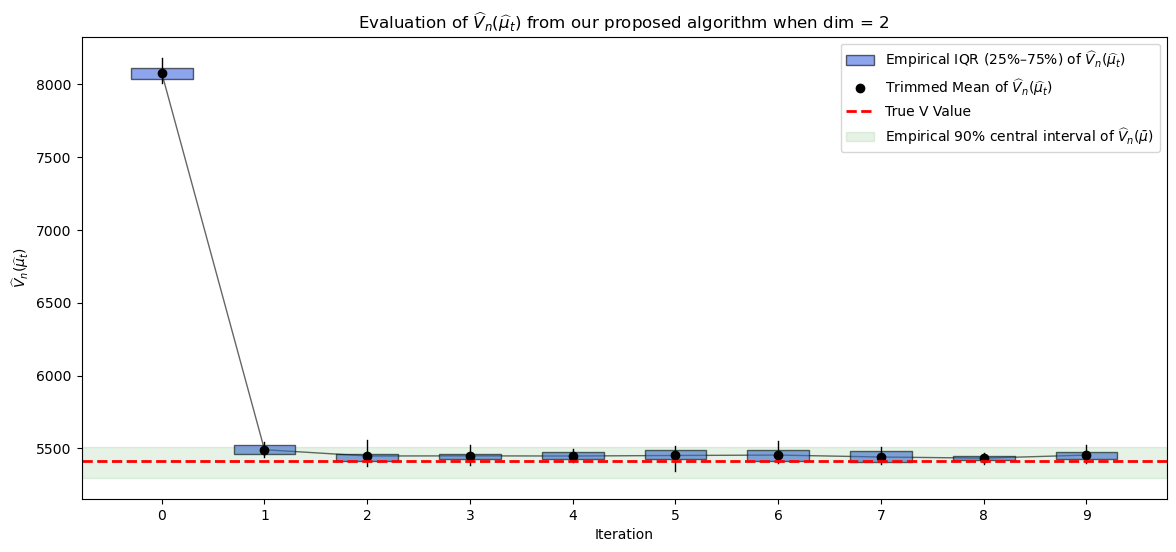

In [49]:
trim_pct = 0.1

plt.figure(figsize=(14, 6))
trimmed_means = []

for iter in range(10):
    with open(f"{V_value_dir}/V_values_iter_{iter}.pkl", "rb") as V_values_file:
        V_values_iter = pickle.load(V_values_file)
    n = len(V_values_iter)
    k = int(n * trim_pct)
    sorted_vals = np.sort(V_values_iter)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([iter, iter], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if iter == 0 else None

    plt.fill_between([iter - box_width/2, iter + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(iter, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if iter == 0 else "")
    trimmed_means.append(trimmed_mean)

# Draw true V value
plt.axhline(mean_true_V_dim2, color='red', linestyle='--', linewidth=2, label='True V Value')
plt.plot(range(10), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
plt.axhspan(lb_dim2, ub_dim2, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(10), labels=range(10))

plt.xlabel('Iteration')
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from our proposed algorithm when dim = 2")
plt.legend()
plt.savefig(f"{result_path}/V_values_convergence_SFP.png")
plt.show()


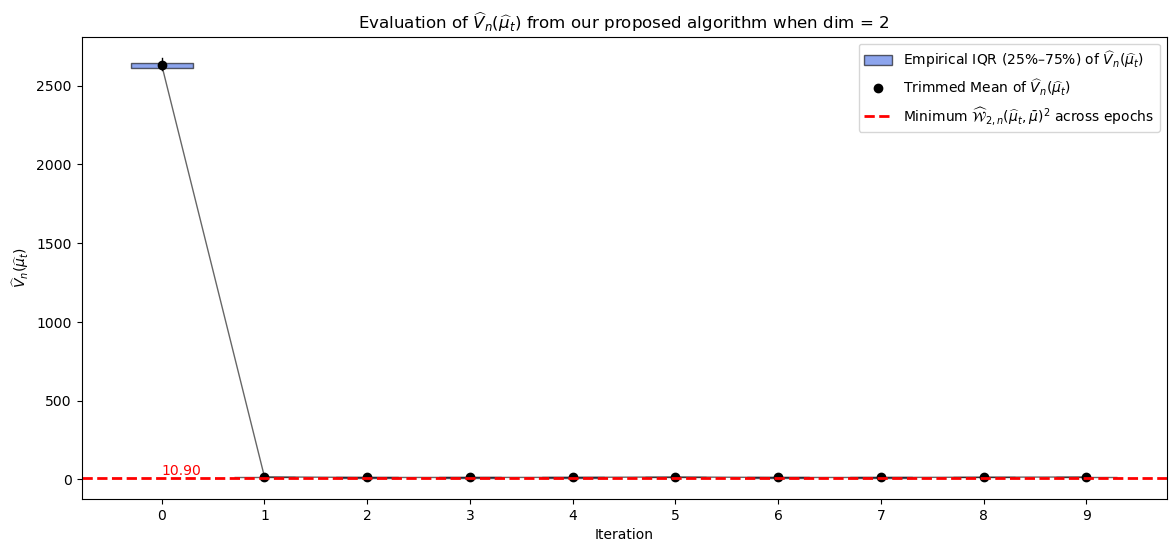

In [51]:
trim_pct = 0.1

plt.figure(figsize=(14, 6))
trimmed_means = []
all_values = []

for iter in range(10):
    with open(f"{W2_to_true_dirc}/W2_to_true_iter_{iter}.pkl", "rb") as W2_to_true_file:
        W2_to_true_iter = pickle.load(W2_to_true_file)
    n = len(W2_to_true_iter)
    k = int(n * trim_pct)
    sorted_vals = np.sort(W2_to_true_iter)
    trimmed_vals = sorted_vals[k:-k] if k > 0 else sorted_vals

    # Stats
    trimmed_mean = np.mean(trimmed_vals)
    lower_quantile = np.quantile(trimmed_vals, 0.25)
    upper_quantile = np.quantile(trimmed_vals, 0.75)
    min_val = np.min(trimmed_vals)
    max_val = np.max(trimmed_vals)
    all_values.append(trimmed_vals)

    box_width = 0.6

    # Draw "whiskers" from min to max
    plt.plot([iter, iter], [min_val, max_val], color='black', linewidth=1)

    # Only label the first box so legend doesn't repeat
    label = r'Empirical IQR (25%–75%) of $\widehat{V}_n(\widehat{\mu}_t)$' if iter == 0 else None

    plt.fill_between([iter - box_width/2, iter + box_width/2],
                    lower_quantile, upper_quantile,
                    color='royalblue', alpha=0.6,
                    edgecolor='black', linewidth=1,
                    label=label)

    # Draw trimmed mean
    plt.plot(iter, trimmed_mean, 'o', color='black', markersize=6, label=r'Trimmed Mean of $\widehat{V}_n(\widehat{\mu}_t)$' if iter == 0 else "")
    trimmed_means.append(trimmed_mean)

min_achieved = np.min([np.min(vals) for vals in all_values])
# Draw true V value
# plt.axhline(mean_true_V_dim2, color='red', linestyle='--', linewidth=2, label='True V Value')
plt.axhline(min_achieved, color='red', linestyle='--', linewidth=2,
            label=r'Minimum $\widehat{\mathcal{W}}_{2, n}(\widehat{\mu}_t, \bar{\mu})^2$ across epochs')
# Add a label (adjust x-position if needed)
plt.text(0, min_achieved,
         f"{min_achieved:.2f}",  # format to 2 decimals
         color='red', fontsize=10, va='bottom')
plt.plot(range(10), trimmed_means,
         color='black', linestyle='-', linewidth=1, alpha=0.6, zorder=0)
# plt.axhspan(lb_dim2, ub_dim2, color='green', alpha=0.1, label=r'Empirical 90% central interval of $\widehat{V}_n(\bar{\mu})$')
plt.xticks(ticks=range(10), labels=range(10))

plt.xlabel('Iteration')
plt.ylabel(r"$\widehat{V}_n(\widehat{\mu}_t)$")
plt.title(r"Evaluation of $\widehat{V}_n(\widehat{\mu}_t)$ from our proposed algorithm when dim = 2")
plt.legend()
plt.savefig(f"{result_path}/W2_to_true_convergence_SFP.png")
plt.show()


Draw the Mapping Plot

In [53]:
import pickle
import os
import sys
# Get the parent folder path (folder K)
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
print(parent_folder)

# Add folder A to the Python path
folder_classes_path = os.path.join(parent_folder, 'classes')
sys.path.append(folder_classes_path)

/Users/zeyichen/GitHub/Repo/WB_Algo/Stochastic_FP


In [54]:
from true_WB import *
from input_generate_plugin import *
from entropic_estimate_OT import *
from entropic_iterative_scheme import *
from config_log import *
from measure_visualize import *
from input_generate_entropy import *
from sample_plot import *

In [55]:
dim = 2
num_samples = 5000
num_measures = 5
iter = 0
truncated_radius = 150
seed = 1009

In [56]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.random_components(num_components=5, uniform_weights = True, seed = seed) # seed from the measure selection
# source_sampler.set_truncation(truncated_radius)
auxiliary_measure_sampler_set = []
for auxiliary_seed in [1010, 1018, 1014, 1016, 1003]:
    auxiliary_measure_sampler = MixtureOfGaussians(dim)
    auxiliary_measure_sampler.random_components(num_components=5, uniform_weights = True, seed = auxiliary_seed)
    # auxiliary_measure_sampler.set_truncation(truncated_radius)
    auxiliary_measure_sampler_set.append(auxiliary_measure_sampler)

In [57]:
# construct entropic_sampler
entropic_sampler = entropic_input_sampler(dim, 
                                          num_measures, 
                                          auxiliary_measure_sampler_set, 
                                          source_sampler = source_sampler, 
                                          n_k = 1000, 
                                          seed = 120, 
                                          gamma = 0.3, 
                                          manual = True,
                                          truncated_radius = truncated_radius,
                                          bound_type = "eigen_bound")

In [58]:
epsilon = 10
result_dir = "results"
os.makedirs(result_dir, exist_ok=True)
save_pathname = f"{result_dir}/entropic_measures_{num_measures}_seed_{seed}_samples_{num_samples}_dim_{dim}_epsilon_{epsilon}"
os.makedirs(save_pathname, exist_ok=True)

In [59]:
# Load the sampler attributes
with open(f"{save_pathname}/entropic_sampler_info.pkl", "rb") as f:
    loaded_data_entropic_sampler = pickle.load(f)

with open(f"{save_pathname}/source_sampler_info.pkl", "rb") as f:
    loaded_data_source_sampler = pickle.load(f)

print("Loaded Data for Entropic Sampler:", loaded_data_entropic_sampler)
print("Loaded Data for Source Sampler:", loaded_data_source_sampler)

Loaded Data for Entropic Sampler: {'dim': 2, 'num_measures': 5, 'auxiliary_measure_sampler_set': [<true_WB.MixtureOfGaussians object at 0x14f84b450>, <true_WB.MixtureOfGaussians object at 0x1817b5950>, <true_WB.MixtureOfGaussians object at 0x1817b5dd0>, <true_WB.MixtureOfGaussians object at 0x1817b6250>, <true_WB.MixtureOfGaussians object at 0x1817b66d0>], 'tilde_K': 5, 'source_sampler': <true_WB.MixtureOfGaussians object at 0x1817b6c10>, 'n_k': 1000, 'seed': 120, 'rng_entropy': RandomState(MT19937) at 0x140E79240, 'gamma': 0.3, 'manual': True, 'truncated_radius': 150, 'bound_type': 'eigen_bound', 'grid_size': 200, 'strong_convexity_param_dict': {0: 0.0001, 1: 0.0001, 2: 0.0001, 3: 0.0001, 4: 0.0001}, 'theta_dict': {0: 10, 1: 10, 2: 10, 3: 10, 4: 10}, 'Y_matrix_dict': {0: array([[ 83.25389778,  -6.77748404],
       [-24.38674772, -23.76266702],
       [ 97.2196175 ,  -0.66185246],
       ...,
       [-35.17059538,  10.05658482],
       [-14.49614928, -84.75519572],
       [-10.84955811

In [60]:
source_sampler = MixtureOfGaussians(dim)
source_sampler.__dict__.update(loaded_data_source_sampler)

entropic_sampler = entropic_input_sampler(dim, num_measures, auxiliary_measure_sampler_set, source_sampler = source_sampler, n_k = 1000, seed = 120)
entropic_sampler.__dict__.update(loaded_data_entropic_sampler)

In [61]:
OT_collections = {}

In [62]:
def iterative_sample(iter, num_samples = 500):
    count = 0
    accepted = np.zeros((num_samples, dim))
    initialized = np.zeros((num_samples, dim))

    with tqdm(total=num_samples, desc=f"sampling from the pushforward measure at iteration_{iter}") as pbar:
        while count < num_samples:
            sample = np.random.multivariate_normal(np.zeros(dim), np.eye(dim))

            for t in range(iter):
                # to be executed only when iter > 0
                sum_sample = np.zeros(dim)
                for measure_index in range(num_measures):
                    OT_map_estimator = OT_collections[(t, measure_index)]
                    sub_sample = OT_map_estimator.regularize_entropic_OT_map(truncated_radius**2, sample)
                    sum_sample += sub_sample

                # Average the pushforward samples from all measures
                new_sample = sum_sample / num_measures

            if iter == 0:
                new_sample = sample

            # Check if the sample is within the truncation radius
            if np.linalg.norm(new_sample) < truncated_radius:
                accepted[count, :] = new_sample
                initialized[count, :] = sample
                count += 1
                if (count + 1) % 10 == 0:
                    pbar.update(10)
                        
    return accepted, initialized
    

In [63]:
def map_construct(accepted_samples, iter, epsilon = 10):

    num_samples = accepted_samples.shape[0]
    # entropic_sampler = self.entropic_sampler
    input_measures_samples = entropic_sampler.sample(num_samples) # this is a dictionary with k keys, each key is a list of samples from the k-th measure

    BX = accepted_samples

    for measure_index in tqdm(range(num_measures)):
        BY = np.array(input_measures_samples[measure_index])
        OT_map_estimator = entropic_OT_map_estimate(BX, BY, log = True)
        OT_map_estimator.get_dual_potential(epsilon = epsilon)
        OT_collections[(iter, measure_index)] = OT_map_estimator

In [64]:
iter = 0
while iter < 2:
    accepted, initialized = iterative_sample(iter, num_samples = 2000)
    # source_samples = source_sampler.sample(num_samples)
    if iter == 0:
        map_construct(accepted, iter, epsilon)
    iter += 1


sampling from the pushforward measure at iteration_0: 100%|██████████| 2000/2000 [00:00<00:00, 15318.52it/s]
100%|██████████| 5/5 [00:07<00:00,  1.40s/it]
sampling from the pushforward measure at iteration_1: 100%|██████████| 2000/2000 [00:09<00:00, 203.49it/s]


In [65]:
n = len(accepted)
n

2000

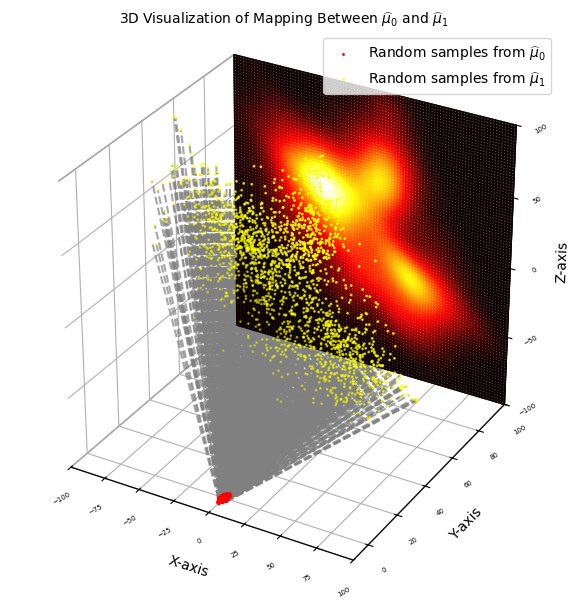

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = len(accepted)

source_samples = initialized
target_samples = accepted 

# Add z-coordinates for the source (z = 0) and target (x = 100) planes
source_samples_3d = np.hstack([source_samples, np.zeros((n, 1)) - 100])  # z = -100 for source plane
target_samples_3d = np.hstack([target_samples[:, 0].reshape(-1, 1), np.ones((n, 1)) * 50, target_samples[:, 1].reshape(-1, 1)]) # x = 100 for target plane

# Create a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1]) 
ax.set_facecolor("white")  # Set background color to black

# Plot the source samples on z = 0
ax.scatter(source_samples_3d[:, 0], source_samples_3d[:, 1], source_samples_3d[:, 2],
           color="red", label= r"Random samples from $\widehat{\mu}_0$", s = 1)

# Plot the target samples on x = 100
ax.scatter(target_samples_3d[:, 0], target_samples_3d[:, 1], target_samples_3d[:, 2],
           color="yellow", label= r"Random samples from $\widehat{\mu}_1$", s = 1)

# Draw lines to visualize the mapping
for i in range(n):
    ax.plot(
        [source_samples_3d[i, 0], target_samples_3d[i, 0]],
        [source_samples_3d[i, 1], target_samples_3d[i, 1]],
        [source_samples_3d[i, 2], target_samples_3d[i, 2]],
        color="gray", linestyle="--", alpha=0.7
    )

# Kernel Density Estimation (KDE) for target samples
xy = np.vstack([target_samples[:, 0], target_samples[:, 1]])
kde = gaussian_kde(xy)
xi, zi = np.linspace(-100, 100, 100), np.linspace(-100, 100, 100)
xi, zi = np.meshgrid(xi, zi)
xz_coords = np.vstack([xi.ravel(), zi.ravel()])
kde_values = kde(xz_coords).reshape(xi.shape)

# Plot the KDE heatmap as a surface on y = 100
ygrid = np.ones_like(xi) * 100  # y = 100 plane
ax.plot_surface(xi, ygrid, zi, facecolors=plt.cm.hot(kde_values / np.max(kde_values)), rstride=1, cstride=1, alpha=0.7, shade=False)

# # Generate heatmap for the target samples on y = 100
# heatmap, xedges, zedges = np.histogram2d(target_samples[:, 0], target_samples[:, 1], bins=200, range=[[-100, 100], [-100, 100]])
# xcenters = 0.5 * (xedges[:-1] + xedges[1:])
# zcenters = 0.5 * (zedges[:-1] + zedges[1:])

# # Plot the heatmap as a surface on y = 100
# xgrid, zgrid = np.meshgrid(xcenters, zcenters)
# ygrid = np.ones_like(xgrid) * 100  # y = 100 plane
# ax.plot_surface(xgrid, ygrid, zgrid, facecolors=plt.cm.hot(heatmap.T / np.max(heatmap)), rstride=1, cstride=1, alpha=0.7, shade=False)

# Set labels and title
ax.set_title(r"3D Visualization of Mapping Between $\widehat{\mu}_0$ and $\widehat{\mu}_1$", fontsize=10, color="black")
ax.set_xlabel("X-axis", color="black")
ax.set_ylabel("Y-axis", color="black")
ax.set_zlabel("Z-axis", color="black")
ax.set_zticks(np.linspace(-100, 100, 5)) 

# Set axis ranges to [-100, 100]
ax.set_xlim([-100, 100])
ax.set_ylim([-10, 100])
ax.set_zlim([-100, 100])

# Customize tick colors
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='z', colors='black')

# Make the grid lines and pane colors match the background
ax.xaxis.pane.set_edgecolor("black")
ax.yaxis.pane.set_edgecolor("black")
ax.zaxis.pane.set_edgecolor("black")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Add legend and grid
ax.legend(loc="upper right", bbox_to_anchor=(1, 1))
ax.grid(alpha=0)

# Rotate tick labels for better visibility
ax.tick_params(axis='x', labelsize=5, rotation=30)  # Adjust X-axis ticks
ax.tick_params(axis='y', labelsize=5, rotation=30)  # Adjust Y-axis ticks
ax.tick_params(axis='z', labelsize=5, rotation=30)  # Adjust Z-axis ticks


# Tighten the layout to fit everything properly
plt.tight_layout()


# Show the plot
plot_save_path = f"{save_pathname}/Map_Visualization.png"
plt.savefig(plot_save_path)
# Show the plot
plt.show()


In [80]:
source_measure_samples = source_sampler.sample(2000, multiplication_factor=1)


source sampling: 100%|██████████| 2000/2000 [00:00<00:00, 11143.74it/s]


In [81]:
dim = source_measure_samples.shape[1]
if dim > 2:
    # Perform PCA to reduce dimensions to 2D
    pca = PCA(n_components=2)
    samples = pca.fit_transform(source_measure_samples)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
# Use a black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
# Set axis limits to include all samples and contours


ax.set_xlim(-120, 100)
ax.set_ylim(-100, 100)
# Get KDE data
x_mesh, y_mesh, kde_values = get_kde_data(source_measure_samples)
# Plot KDE as a contour plot
h = ax.contourf(x_mesh, y_mesh, kde_values, levels=200, cmap='hot')
# Overlay scatter plot if requested

# Set title and labels
ax.set_title('Samples', color='white')
ax.set_xlabel('X1', color='white')
ax.set_ylabel('X2', color='white')

# Adjust axis colors for visibility on black background
ax.tick_params(colors='white')
# Add a colorbar
cbar = fig.colorbar(h, ax=ax)
cbar.ax.yaxis.set_tick_params(color='white')
cbar.outline.set_edgecolor('white')


os.makedirs(save_pathname, exist_ok=True)
# Save the figure
plt.savefig(f"{save_pathname}/source_measure_plot.png", facecolor='black')
# Close the plot to free memory
plt.close()

